Copyright 2025 Google LLC.
SPDX-License-Identifier: Apache-2.0

<a href="https://colab.research.google.com/github/datacommonsorg/api-python/blob/master/notebooks/v2/intro_data_science/Introduction_to_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Clustering

We have previously looked at training models when we have labels, categories, or some other classification from which to extract relationships in our data. When we classify data with known labels, this is known as _supervised learning_. But what if we have data without matching labels and aim to identify inherent patterns in the data without knowing the relationships in advance? This is when we utilize _unsupervised learning_.

One common technique in unsupervised learning is **clustering**, also known as cluster analysis. The goal of clustering is to divide your data points into groups (clusters), such that data points in each group are more similar to each other than to data points in other clusters. Clustering is used in many fields for data exploration.

In this assignment, we will build some intuition for clustering by applying the technique to case studies.

## Learning goals
* Understand what clustering is and does
* See how clustering can be used to find patterns
* Build intuition into how clustering works
* Gain hands-on experience clustering real-world data

## 0) A brief primer on k-means

There are many different algorithms for clustering data. For this assignment, we'll be using the **k-means** algorithm, one of the most popular and easiest to understand clustering algorithms.

In k-means, you need to specify how many clusters the algorithm should divide your data into, so the number of clusters you select is a tunable hyperparameter. The k-means algorithm subsequently attempts to create that many clusters by minimizing the Euclidean distance between points in the same cluster.

Don't worry too much about implementation details right now, the goal of this assignment is to build intuition about clustering. We'll look more into the mechanics of how things work in part 2. If you're interested in the details, you can take a look at the [Wikipedia entry on k-means](https://en.wikipedia.org/wiki/K-means_clustering) in the meantime.

Run the following code boxes to load the Python libraries and data we'll be using today.

In [1]:
!pip install "datacommons-client[Pandas]" --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 1.4 MB/s eta 0:00:00


## 1) Images: building intuition with FashionMNIST

We'll start exploring clustering with a simple, intuitive case: clustering the [FashionMNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

The FashionMNIST dataset is a collection of over 60,000 (28x28) greyscale images of various clothing items (e.g. shoes, shirts, bags) that's often used as a nice toy dataset in computer vision circles. While this particular dataset already has labels for each image, we'll be working with the images only. That is, we'll see what patterns in FashionMNIST we can recover without using any labels.

Let's start by loading the dataset and viewing some sample images.


Loaded 2000 images. The first 25 are:


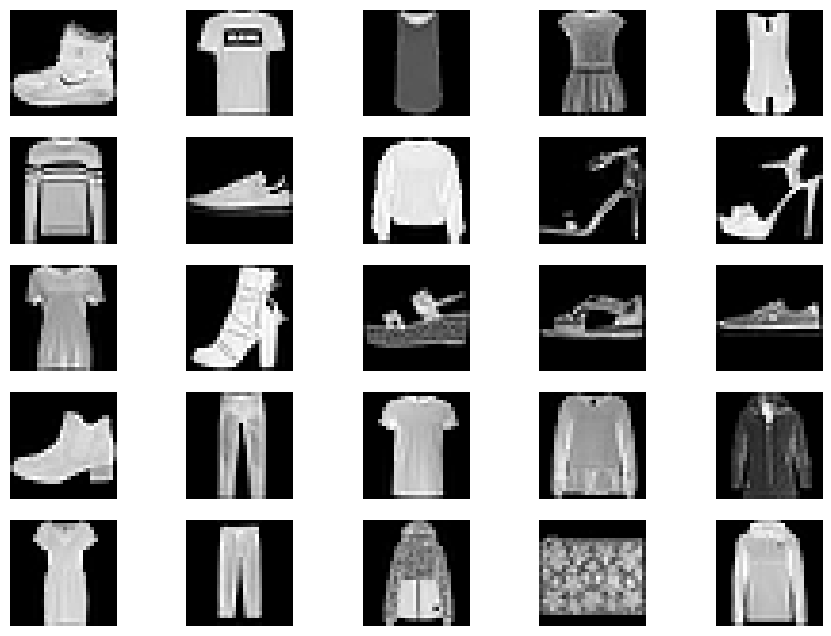

In [ ]:
# load dataset
from keras.datasets import fashion_mnist
(fashion_mnist, labels), _ = fashion_mnist.load_data()

# limit to first 2000 images so runtimes are reasonable
fashion_mnist = fashion_mnist[:2000, :, :]

# Show the first 25 images as a sample
print(f"Loaded {fashion_mnist.shape[0]} images. The first 25 are:")
sns.set(rc={'figure.figsize':(11,8)})
for i in range(25):
  # define subplot
  plt.subplot(5, 5, i+1)
  # plot raw pixel data
  plt.imshow(fashion_mnist[i], cmap=plt.get_cmap('gray'))
  plt.axis("off")
plt.show()

To cluster the images, we'll need to convert the images into a format we can pass into our KMeans model, which expects 1D feature vectors. For this assignment, we'll just flatten our image. This is akin to cutting each image up into rows, and concatenating the rows end-to-end to form one long, skinny image.

Note that this is a rather naive way to vectorize images, and there exist better ways to represent images for clustering. We will continue with this approach in the interest of simplicity.

In [ ]:
# squash images into 1D
fashion_data = fashion_mnist.reshape((-1, 28*28))

Now run the code box below using different numbers of clusters, and note how the clustering results change.

Cluster 0 contains 919 images. The first 25 are:


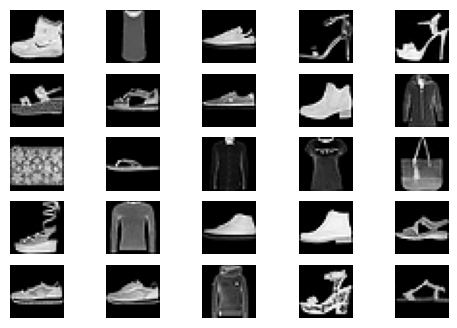

Cluster 1 contains 1081 images. The first 25 are:


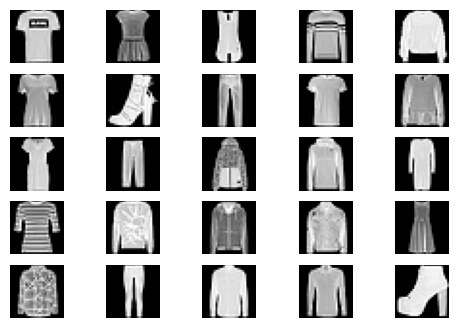

In [ ]:
# set number of clusters
k = 2   # Change me! Try 2, 8, 10, 15

# cluster the images
kmeans = KMeans(n_clusters=k).fit(fashion_data)

# create a dictionary of clusters to images
clusters = {n:[] for n in range(k)}
for i in range(fashion_data.shape[0]):
  key = kmeans.labels_[i]
  value = fashion_data[i,:].reshape(1, 28, 28).squeeze()
  clusters[key].append(value)

# display images from each cluster
sns.set(rc={'figure.figsize':(6,4)})
for cluster_num, images in clusters.items():
  print(f'Cluster {cluster_num} contains {len(images)} images. The first 25 are:')
  for i in range(min(25, len(images))):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot pixel data
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.axis("off")
  plt.show()

### 1.1) Effect of number of clusters
**Q1: Try each of the settings `k=2`, `k=10`, and `k=15`. What value of k results in clusters that are most meaningful?**

A1: Because FashionMNIST was created with 10 original categories, we should expect k=10 to work best of the settings suggested. You might rightfully observe that the "best" k can depend on what you're looking for (e.g. if k=2 is just shoes vs non-shoes, this might be the right level of nuance for your application!)

**Q2: What happens if k is too small? What happens if k is too large?**

A2: Too small and the clusters will still look heterogenous. Too large and we'll have clusters that seem to represent the same object (e.g. multiple clusters of shirts).

### 1.2) What features are used for clustering?
**Q3: Let's go back to `k=2`. What features of the images does KMeans seem to be using to split the data into two groups? Why do you think this was the feaure used?**

A3: k=2 tends to cluster based on image intensity (e.g. dark vs light images). Because k-means uses euclidean distance between pixel values, high on average and low on average pixel values would be the most distinguishing feature at the k=2 level.

**Q4: Now compare `k=10` with `k=8`. Which items or traits group together in `k=8` compared to `k=10`?**

A4: You may notice that items that look similar (e.g. bag with similar area and shading to shirts) will group first with those items that are most similar.

### 1.3) Extension question

**Q5 (Extension): Imagine you have a set of 1 million unlabeled images that look just like these fashion MNIST images, and you want to generate categorical labels for each of the images. However, labeling each of those 1 million images is too time intensive and costly.**

**Devise a strategy for how you could use clustering to help you label each of the images.**

*A5: Cluster the 1 million images. Label each of the clusters, and assign every image the label corresponding to its cluster*

*This is semi-supervised learning!*

## 2) Real-world data

Now that we've built up some intuition on what k-means does, let's try clustering on some more complex, real world data. We've provided a list of the DCIDs for 100 countries around the world, along with a starting list of DCIDs of statistical variables.

In case the DCID names are unclear, we will examine the following statistics for each country:
* CO2 emissions per capita
* Life expectancy
* Number of internet users per capita
* Population growth rate
* Percentage of population that is overweight
* [Gini index](https://www.investopedia.com/terms/g/gini-index.asp) (A measure of economic inequality)
* Percentage of population with mobile phone subscriptions
* [Gross domestic product](https://en.wikipedia.org/wiki/Gross_domestic_product) per captia
* [Fertility rate](https://data.oecd.org/pop/fertility-rates.htm)
* Number of deaths per year, normalized by population

Run the following code boxes to load and cluster the data associated with each country.

In [ ]:
countries = [
  'country/AGO', 'country/ALB', 'country/ARG', 'country/ARM', 'country/AUS',
  'country/AZE', 'country/BDI', 'country/BGD', 'country/BGR', 'country/BIH',
  'country/BLZ', 'country/BOL', 'country/BRA', 'country/BTN', 'country/BWA',
  'country/CAN', 'country/CHL', 'country/CHN', 'country/CMR', 'country/COD',
  'country/COG', 'country/COL', 'country/CRI', 'country/CZE', 'country/DOM',
  'country/DZA', 'country/ECU', 'country/EGY', 'country/ETH', 'country/FJI',
  'country/GAB', 'country/GEO', 'country/GHA', 'country/GTM', 'country/GUY',
  'country/HND', 'country/IDN', 'country/IND', 'country/IRN', 'country/JAM',
  'country/JOR', 'country/JPN', 'country/KAZ', 'country/KEN', 'country/KGZ',
  'country/KIR', 'country/KOR', 'country/LAO', 'country/LBN', 'country/LCA',
  'country/LSO', 'country/MAR', 'country/MDA', 'country/MDG', 'country/MEX',
  'country/MLI', 'country/MMR', 'country/MNE', 'country/MNG', 'country/MOZ',
  'country/MRT', 'country/MWI', 'country/MYS', 'country/NAM', 'country/NER',
  'country/NGA', 'country/NIC', 'country/NPL', 'country/PAK', 'country/PAN',
  'country/PER', 'country/PHL', 'country/PNG', 'country/PRY', 'country/ROU',
  'country/RWA', 'country/SDN', 'country/SLV', 'country/SRB', 'country/SWZ',
  'country/SYR', 'country/THA', 'country/TJK', 'country/TKM', 'country/TLS',
  'country/TON', 'country/TTO', 'country/TUN', 'country/TUR', 'country/TZA',
  'country/UGA', 'country/UKR', 'country/USA', 'country/UZB', 'country/VNM',
  'country/VUT', 'country/YEM', 'country/ZAF', 'country/ZMB', 'country/ZWE'
]

stat_vars_to_query = [
  "Amount_Emissions_CarbonDioxide_PerCapita",
  "LifeExpectancy_Person",
  "Count_Person_IsInternetUser_PerCapita",
  "GrowthRate_Count_Person",
  "Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years",
  "GiniIndex_EconomicActivity",
  "Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person",
  "Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita",
  "FertilityRate_Person_Female",
  "Count_Death_AsAFractionOfCount_Person"
]
df = client.observations_dataframe(entity_dcids=countries, variable_dcids=stat_vars_to_query, date='latest')
display(df)

,date,entity,entity_name,variable,variable_name,value,facetId,importName,measurementMethod,observationPeriod,provenanceUrl,unit
0,2023,country/ARG,Argentina,GrowthRate_Count_Person,Rate of Population Growth,0.286976,3981252704,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,None
1,2023,country/UGA,Uganda,GrowthRate_Count_Person,Rate of Population Growth,2.800832,3981252704,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,None
2,2002,country/UGA,Uganda,GrowthRate_Count_Person,Rate of Population Growth,3.200000,1312347814,Uganda_Census,None,None,https://uganda.opendataforafrica.org/,Percent
3,2023,country/BOL,Bolivia,GrowthRate_Count_Person,Rate of Population Growth,1.373344,3981252704,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,None
4,2023,country/MDG,Madagascar,GrowthRate_Count_Person,Rate of Population Growth,2.462015,3981252704,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1042,2023,country/COG,Congo [Republic],Amount_Emissions_CarbonDioxide_PerCapita,CO2 Emissions Per Capita,1.172721,4225050521,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,MetricTon
1043,2023,country/MRT,Mauritania,Amount_Emissions_CarbonDioxide_PerCapita,CO2 Emissions Per Capita,0.925904,4225050521,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,MetricTon
1044,2023,country/TUR,Turkey,Amount_Emissions_CarbonDioxide_PerCapita,CO2 Emissions Per Capita,5.136955,4225050521,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,MetricTon
1045,2023,country/SWZ,Eswatini,Amount_Emissions_CarbonDioxide_PerCapita,CO2 Emissions Per Capita,1.129779,4225050521,WorldDevelopmentIndicators,None,P1Y,https://datacatalog.worldbank.org/dataset/worl...,MetricTon


### 2.1) Flattening data per countrry

Each row in the DataFrame reflects a single statistical observation. Before applying statistical normalization, we will rearrange our data to reflect the observations per country as columns.

To accomplish this, we can group by `(entity, entity_name, variable)` and then apply a pivot on the subset of columns we wish to retain. In our Data Commons query we requested the `latest` observation for each statistical variable; however, if we had selected a range this would be the time to also collapse the observations to a single desired value.

Finally we will rename our index to be the name of the country.

Run the code below to rearrange and flatten our data rows in the DataFrame.

In [ ]:
# group on (entity_name, variable) and pivot on (variable, value)
df = df.groupby(["entity_name", "variable"]).first().reset_index()
df = df[["entity_name", "variable", "value"]]
df = df.pivot(index=["entity_name"], columns="variable", values="value")
df = df.dropna()

# index on countryCode and rename `entity_name` > `Country Name`
df = df.reset_index()
df.rename(columns={"entity_name": "Country"}, inplace=True)
df.set_index("Country", inplace=True)
df = df.reindex(sorted(df.columns), axis=1)

display(df)

variable,Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,Amount_Emissions_CarbonDioxide_PerCapita,Count_Death_AsAFractionOfCount_Person,Count_Person_IsInternetUser_PerCapita,Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,FertilityRate_Person_Female,GiniIndex_EconomicActivity,GrowthRate_Count_Person,LifeExpectancy_Person
Country,,,,,,,,,,
Albania,8575.171134,1.672195,8.332,83.1,0.164,0.978857,1.348,29.4,-1.148418,79.602000
Algeria,5364.027950,3.906870,4.641,76.9,0.128,1.091654,2.766,27.6,1.498976,76.261000
Angola,2308.159767,0.768163,6.925,44.8,0.034,0.673735,5.124,51.3,3.080655,64.617000
Argentina,14187.482725,4.035680,7.668,89.2,0.124,1.323578,1.500,40.7,0.286976,77.395000
Armenia,8053.010663,2.582868,8.200,80.0,0.137,1.352540,1.900,27.9,0.728179,77.465854
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,3515.236336,0.896666,5.083,45.7,0.049,0.781995,3.596,32.3,2.324816,71.477000
Vietnam,4282.088517,3.716396,6.577,78.1,0.094,1.399497,1.913,36.1,0.671429,74.588000
Yemen,477.409029,0.276684,4.792,13.8,0.015,0.460195,4.590,36.7,3.009808,69.295000


### 2.2) The importance of normalization
Scroll through the Dataframe generated by the codebox above, and take note of the scales of each of the features. They can vary drastically in magnitude! Let's normalize our data before clustering.

**Q1: What do you think would happen if we didn't normalize our data before clustering?**

*A1:Generally the features with higher magnitudes will end up dominating the clustering.*

In [ ]:
# normalize the values
mean_df = df.mean(numeric_only=True)
std_df = df.std(numeric_only=True)

normalized_df = ((df-mean_df)/std_df)
display(normalized_df)

variable,Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,Amount_Emissions_CarbonDioxide_PerCapita,Count_Death_AsAFractionOfCount_Person,Count_Person_IsInternetUser_PerCapita,Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,FertilityRate_Person_Female,GiniIndex_EconomicActivity,GrowthRate_Count_Person,LifeExpectancy_Person
Country,,,,,,,,,,
Albania,0.015907,-0.391186,0.536685,0.744805,1.980104,-0.278208,-1.073052,-1.104609,-1.505603,1.339295
Algeria,-0.237729,0.214853,-1.060964,0.495524,1.224963,0.072146,0.108974,-1.323815,0.189843,0.772765
Angola,-0.479101,-0.636357,-0.072335,-0.795104,-0.746793,-1.225942,2.074573,1.562408,1.202783,-1.201693
Argentina,0.459203,0.249786,0.249273,0.990064,1.141059,0.792521,-0.946347,0.271523,-0.586347,0.965056
Armenia,-0.025336,-0.144213,0.479549,0.620165,1.413749,0.882479,-0.612912,-1.287281,-0.303791,0.977071
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.383758,-0.601507,-0.869644,-0.758918,-0.432151,-0.889678,0.800852,-0.751442,0.718728,-0.038451
Vietnam,-0.323187,0.163197,-0.222966,0.543772,0.511775,1.028331,-0.602075,-0.288672,-0.340135,0.489077
Yemen,-0.623705,-0.769645,-0.995603,-2.041505,-1.145340,-1.889211,1.629437,-0.215603,1.157411,-0.408450


### 2.3) Interpreting clusters
Now let's cluster our data! Once again, play around with $k$ to see how the results change.

In [ ]:
# Clustering using K-means
n_clusters = 3
kmeans_model = KMeans(n_clusters).fit(normalized_df)
labels_df = pd.DataFrame(data=np.transpose(kmeans_model.labels_), index=normalized_df.index, columns=['cluster'])

# list countries in each cluster:
for i in range(n_clusters):
  print(f'Countries in Cluster {i}:')
  print(labels_df.index[labels_df['cluster']==i].tolist())
  print(len(labels_df.index[labels_df['cluster']==i].tolist()))

Countries in Cluster 0:
['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belize', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Gabon', 'Guatemala', 'Guyana', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'Lebanon', 'Malaysia', 'Mexico', 'Mongolia', 'Morocco', 'Nepal', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Saint Lucia', 'South Africa', 'Tajikistan', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Uzbekistan', 'Vietnam']
49
Countries in Cluster 1:
['Angola', 'Burundi', 'Cameroon', 'Congo [DRC]', 'Congo [Republic]', 'East Timor', 'Eswatini', 'Ethiopia', 'Ghana', 'Honduras', 'Kenya', 'Kiribati', 'Laos', 'Lesotho', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar [Burma]', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Rwanda', 'Sudan', 'Syria', 'Tanzania', 'Turkmenistan', 'Uganda',

#### Analyzing centroids

What characterizes each of the clusters?

It can be a little hard to tell what characteristics each cluster has latched on to from cluster membership alone. One way to characterize clusters is to look at the **centroids**, which are the average values of each cluster. One can think of the centroids as describing the average group member.

Run the following code box to display the values of the centroids of each cluster. *Note: We're displaying the non-normalized values for better interpretability. The clustering was still performed on normalized values.*

In [ ]:
# Get centroids of each cluster.
for i in range(n_clusters):
  print(f'\nCluster {i}:')
  # display non-normalized mean values
  mean_to_display = df[labels_df['cluster']==i].mean()
  display(mean_to_display)


Cluster 0:


,0
variable,
Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,7354.195071
Amount_Emissions_CarbonDioxide_PerCapita,3.030033
Count_Death_AsAFractionOfCount_Person,6.247837
Count_Person_IsInternetUser_PerCapita,77.895918
Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,0.079265
Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,1.190733
FertilityRate_Person_Female,2.112551
GiniIndex_EconomicActivity,38.606122
GrowthRate_Count_Person,0.922780



Cluster 1:


,0
variable,
Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,1860.935259
Amount_Emissions_CarbonDioxide_PerCapita,0.863238
Count_Death_AsAFractionOfCount_Person,6.817514
Count_Person_IsInternetUser_PerCapita,37.062857
Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,0.042771
Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,0.815895
FertilityRate_Person_Female,3.855400
GiniIndex_EconomicActivity,40.357143
GrowthRate_Count_Person,2.289117



Cluster 2:


,0
variable,
Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,28224.432925
Amount_Emissions_CarbonDioxide_PerCapita,9.039210
Count_Death_AsAFractionOfCount_Person,10.733571
Count_Person_IsInternetUser_PerCapita,86.735714
Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,0.102857
Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,1.271680
FertilityRate_Person_Female,1.414464
GiniIndex_EconomicActivity,33.278571
GrowthRate_Count_Person,-0.534735


#### Visualizing centroids
These values can be difficult to compare on their own. One good way to visualize cluster centroids is by using a color-coded heat map of normalized values. Use the code box below to generate such a heat map.

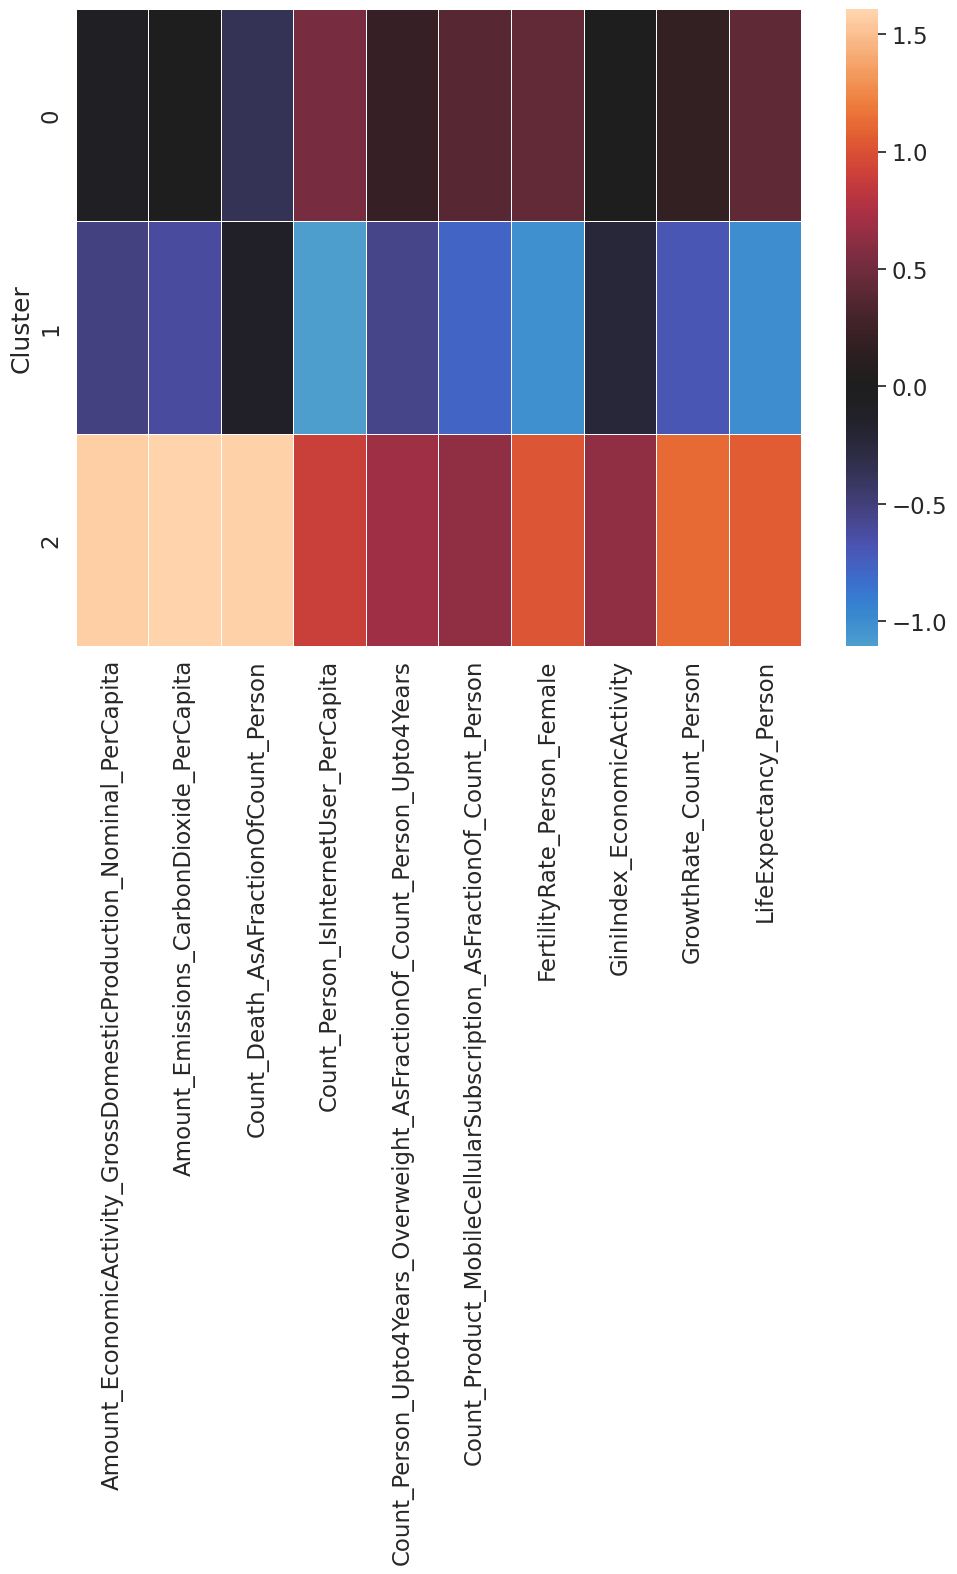

In [ ]:
# get normalized values
normalized_means = []
for i in range(n_clusters):
  # calculate normalized values for the next part
  mean_normalized = normalized_df[labels_df['cluster']==i].mean()
  normalized_means.append(mean_normalized.to_frame().transpose())
normalized_means_df = pd.concat(normalized_means)

# For better visualization, we'll multiply the following features by -1
# so that a higher value is associated with more development.

features_to_flip = [
  "GiniIndex_EconomicActivity",
  "GrowthRate_Count_Person",
  "FertilityRate_Person_Female"
]

for column in features_to_flip:
  normalized_means_df[column] *= -1

# Plot heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 1.5)
ax = sns.heatmap(normalized_means_df.to_numpy(), linewidth=0.5, xticklabels=normalized_means_df.columns, center=0)
ax.set_ylabel("Cluster")
plt.show()

*For Q2-Q4, please answer using `k=3`.*

**Q2: What does each cluster seem to represent?**

Now, here's a list of 3 held-out countries (i.e., countries that weren't part of the original countries we used to create the clusters).

- Germany
- Haiti
- Iraq

**Q3: For each of the countries listed above, make a prediction for which cluster the country would be a member of.**

Run the code box below to get feature values for each country that can help you answer Q3.

In [ ]:
dcids_holdout = ['country/HTI','country/DEU', 'country/IRQ']

# get values for each holdout
df_holdout = client.observations_dataframe(entity_dcids=dcids_holdout, variable_dcids=stat_vars_to_query, date='latest')

# pivot the holdout data and name the axis Country
df_holdout = df_holdout.groupby(["entity_name", "variable"]).first().reset_index()
df_holdout = df_holdout[["entity_name", "variable", "value"]]
df_holdout = df_holdout.pivot(index=["entity_name"], columns="variable", values="value")
df_holdout.rename_axis("Country", inplace=True)

# ensure columns are in exactly the same order as those used previously for clustering
df_holdout = df_holdout[normalized_df.columns]
df_holdout = df_holdout.dropna()

# normalize values for clustering
normalized_df_holdout = ((df_holdout-mean_df)/std_df)
display(normalized_df_holdout)

variable,Amount_EconomicActivity_GrossDomesticProduction_Nominal_PerCapita,Amount_Emissions_CarbonDioxide_PerCapita,Count_Death_AsAFractionOfCount_Person,Count_Person_IsInternetUser_PerCapita,Count_Person_Upto4Years_Overweight_AsFractionOf_Count_Person_Upto4Years,Count_Product_MobileCellularSubscription_AsFractionOf_Count_Person,FertilityRate_Person_Female,GiniIndex_EconomicActivity,GrowthRate_Count_Person,LifeExpectancy_Person
Country,,,,,,,,,,
Germany,3.630955,1.053672,2.254233,1.162952,-0.851674,0.570975,-1.038041,-0.739264,-1.167227,1.498598
Haiti,-0.526680,-0.762266,0.313768,-1.016239,-0.641912,-1.332744,0.017280,0.320236,-0.029593,-1.147600
Iraq,-0.221845,0.315993,-1.281284,0.688516,-0.180438,-0.268936,0.511597,-1.092430,0.671768,0.105173


Now, let's see where these countries would actually have clustered.

In [ ]:
# find which cluster centroid is closest
for country in df_holdout.index:
  country_data = normalized_df_holdout.loc[country].to_numpy()
  country_data = country_data[np.newaxis, :]
  difference = normalized_means_df.to_numpy() - country_data
  distance = np.linalg.norm(difference,axis=1)
  cluster_membership = np.argmin(distance, axis=0)
  print(f"{country} belongs to cluster {cluster_membership}")

Germany belongs to cluster 2
Haiti belongs to cluster 1
Iraq belongs to cluster 0


**Q4: Did these countries cluster in the way that you expected? If not, why not?**

**Q5: Now run this section again for a larger value of K. Are you able to find a setting with more nuance? What traits do the clusters highlight?**